**StockX Data Contest 2019**

The data is provided by the StockX with a random sample of the 'Yeezy' and 'Off-White X Nike' sale records from 2017.09 to 2019.02. The StockX onliy allowed one chart made for whatever aspect the participant would want to focus on. 

For my chart, I decided to focus on the sale record of 'Yeezy' shoes from 2017 to 2019. And take a look at the monthly profit and the profit rate.

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Need to install the seaborn Version 0.9.0 so that I could access the lineplot.

In [1]:
!pip3 install seaborn==0.9.0

In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/StockX-Data-Contest-2019.csv'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization

In [4]:
dat = pd.read_csv(pwd)
print(len(dat))
dat.head(10)

99956


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island
5,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220.0,2/11/17,8.5,Michigan
6,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220.0,12/17/16,11.0,California
7,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220.0,4/29/17,10.0,New York
8,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,4/29/17,11.0,Kansas
9,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,4/29/17,11.0,Florida


**Missing Value Check**

In [5]:
print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
col_names = list(dat.columns.values)
for name in col_names:
  print('total number of NaN in the column ',name,' : ',dat[name].isnull().sum())

total rows contain NaN:  0
total number of NaN in the column  Order Date  :  0
total number of NaN in the column  Brand  :  0
total number of NaN in the column  Sneaker Name  :  0
total number of NaN in the column  Sale Price  :  0
total number of NaN in the column  Retail Price  :  0
total number of NaN in the column  Release Date  :  0
total number of NaN in the column  Shoe Size  :  0
total number of NaN in the column  Buyer Region  :  0


In [6]:
print('Brand Names: ', list(set(dat['Brand'].values)))

Brand Names:  ['Off-White', ' Yeezy']


Select out the 'Yeezy' shoes sale data and aggregated by the month

In [9]:
dat_yeezy = dat.loc[dat.Brand==' Yeezy',:]
print(len(dat_yeezy))

# Calculate the profit and the profit rate for each sale
yeezy_profit = dat_yeezy['Sale Price'].values-dat_yeezy['Retail Price'].values
yeezy_profit_rate = yeezy_profit/dat_yeezy['Retail Price'].values*100
dates = dat_yeezy['Order Date'].values

# Transfer the date to the month
months = []
for dt in dates:
  d = dt.split('/')
  months.append(d[0]+'/'+d[2])

month = ['9/17','10/17','11/17','12/17','1/18','2/18','3/18','4/18',\
         '5/18','6/18','7/18','8/18','9/18','10/18','11/18','12/18','1/19','2/19',]

# Aggregate a new dataframe used to make the chart
monthly_profit = []
monthly_sale_num = []
Months = []
rates = []
categ = []

for mon in month:
  pft = [yeezy_profit[i] for i,val in enumerate(months) if months[i]==mon]
  monthly_profit.append(sum(pft))
  monthly_sale_num.append(len(pft))

  rate = np.array([yeezy_profit_rate[i] for i,val in enumerate(months) if months[i]==mon])
  Months.append(mon)
  rates.append(sum(rate<50))
  categ.append('<50%')
  Months.append(mon)
  rates.append(sum(rate<=100)-sum(rate<50))
  categ.append('50%,100%')
  Months.append(mon)
  rates.append(sum(rate>100))
  categ.append('>100%')
  
d = {'Months':Months,'# of Sales Profit Rates':rates,'Categ':categ}
profit_rate_dat = pd.DataFrame(data=d)
profit_rate_dat.Months = pd.Categorical(profit_rate_dat.Months,\
                                        categories=month,ordered=True)

72162


Try the lineplot

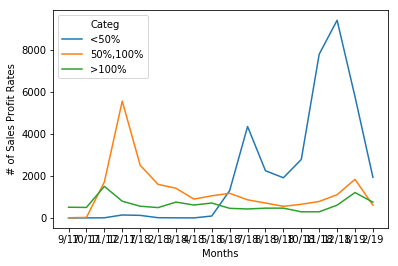

In [10]:
sb.lineplot(x='Months',y='# of Sales Profit Rates',hue='Categ',data=profit_rate_dat)
plt.show()

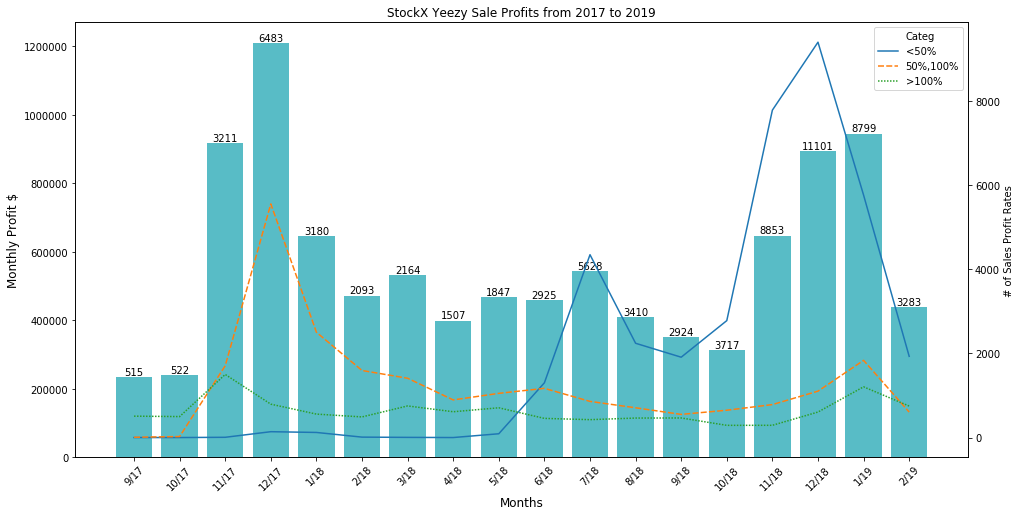

In [13]:
color = sb.color_palette() # Set up the color choices

fig, ax = plt.subplots(figsize=(16,8))
ax.grid(False)
sb.barplot(month,monthly_profit,alpha=0.8,color=color[9])
plt.title("StockX Yeezy Sale Profits from 2017 to 2019")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Monthly Profit $', fontsize=12)
plt.xlabel('Months', fontsize=12)

#adding the text labels
rects = ax.patches
labels = monthly_sale_num

for t in range(18):
    rect = rects[t]
    label = labels[t]
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

ax2 = ax.twinx()    
ax2.grid(False)
sb.lineplot(x='Months',y='# of Sales Profit Rates',hue='Categ',style='Categ',data=profit_rate_dat)

plt.show()  

The bars show the monthly total profits and the monthly total sales numbers are on each bar. The three lines show the number of sales with profit rate '< 50%', 'between 50% and 100%', and '> 100%'. The bar chart uses the left y-axis and the line plot uses the right y-axis. 

In Nov and Dec 2017, the release of 'Beluga 2.0' and the 'Blue Tint' gave a huge boost on profit with a relatively high profit rate for each sale. That was the time both the release number and the price in the second-market optimize the total profit to a peak. However, in 2018, more and more resupply and large quantity release decrease the profit rate in the second-market a lot. By the 11/18, 12/18 and 1/19 data, although the profit rate of the new release wouldn't give people a chance to win much money, people are still willing to sell the yeezy shoes. This would be a new profitable mode for the second-market platform, especially like StockX.